# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
data['income_type'].unique() #типы занятости

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()
#заменили пропуски медианным значением по каждому типа из столбца income_type    

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Сгруппируем данные по количеству детей.
Столбец sum - cумма значений по столбцу debt отражает суммарное количество фактов просрочки по кредиту в каждой категории, так как 1 - есть просрочка, 0 - нет просрочки.
Столбец count - количество клиентов в данной категории.  
Столбец ratio - отношение количества фактов просрочки по кредиту к общему количеству клиентов в данной категории. Данный столбец необходим, так как в количество клиентов в категориях сильно различается.

In [23]:
data_children_grouped=data.groupby('children').agg({'debt':['sum','count']})
data_children_grouped['ratio']=data_children_grouped['debt']['sum']/data_children_grouped['debt']['count']
data_children_grouped['ratio'] *= 100 # умножим на 100 для наглядности

Отсортируем данные по убыванию столбца ratio. 

In [24]:
data_children_sorted = data_children_grouped.sort_values(by='ratio',ascending=False)
data_children_sorted

debt            ratio
           sum  count          
children                       
4            4     41  9.756098
2          194   2052  9.454191
1          444   4808  9.234609
3           27    330  8.181818
0         1063  14091  7.543822
5            0      9  0.000000

Клиенты у которых 4,2,1 детей чаще  не возврващают кредиты в срок, чем те у кого 3,5 детей или нет детей. При этом клиенты с 5 детьми вообще не имееют задолженностей,но таких клиентов всего 9 в данной выборке. Процент просрочек в категориях с 4 и 2 отличается незначительно.

Построим сводную таблицу №1 для клиентов, имеющих задолженность и посмотрим их семейный статус и количество детей.Среди должников больше всего женатых/замужних людей без детей. 

In [25]:
data_pivot = data.pivot_table(index=['family_status'], columns='children', values='debt', aggfunc='sum')
data_pivot = data_pivot.fillna(0).astype(int) #заменим значения NaN на нули для удобства расчетов
data_pivot

children,0,1,2,3,4,5
family_status,,,,,,
Не женат / не замужем,210,52,9,1,1,0
в разводе,55,21,7,1,0,0
вдовец / вдова,53,7,3,0,0,0
гражданский брак,229,118,30,8,0,0
женат / замужем,516,246,145,17,3,0


In [26]:
import seaborn as sns

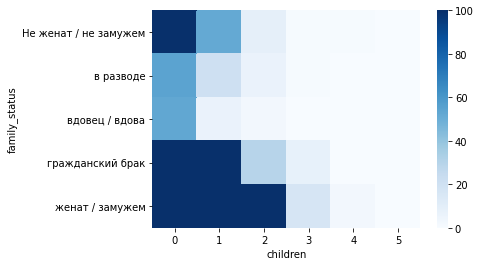

In [27]:
sns.heatmap(data_pivot, vmin=0, vmax=100,cmap='Blues'); 
#построим тепловую карту для наглядного отображения результатов

Построим сводную таблицу№2 для клиентов, имеющих задолженность и посмотрим их уровень дохода и количество детей. Должников больше всего среди тех, у кого детей нет, при этом это люди со средним уровнем дохода.

In [28]:
data_pivot2 = data.pivot_table(index=['total_income_category'], columns='children', values='debt', aggfunc='sum')
data_pivot2 = data_pivot2.fillna(0).astype(int) #заменим значения NaN на нули для удобства расчетов
data_pivot2

children,0,1,2,3,4,5
total_income_category,,,,,,
A,1,1,0,0,0,0
B,220,88,41,4,1,0
C,828,351,149,22,3,0
D,12,4,4,1,0,0
E,2,0,0,0,0,0


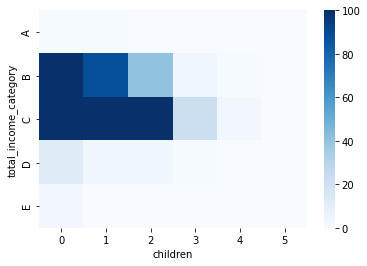

In [29]:
sns.heatmap(data_pivot2, vmin=0, vmax=100,cmap='Blues');
#построим тепловую карту для наглядного отображения результатов

Построим сводную таблицу№3 для клиентов, имеющих задолженность и посмотрим их уровень дохода и количество детей. 

In [30]:
data_pivot3 = data.pivot_table(index=['purpose_category'], columns='children', values='debt', aggfunc='sum')
data_pivot3

children,0,1,2,3,4,5
purpose_category,,,,,,
операции с автомобилем,243,103,48,5,1,0
операции с недвижимостью,476,200,88,13,3,0
получение образования,229,90,46,4,0,0
проведение свадьбы,115,51,12,5,0,0


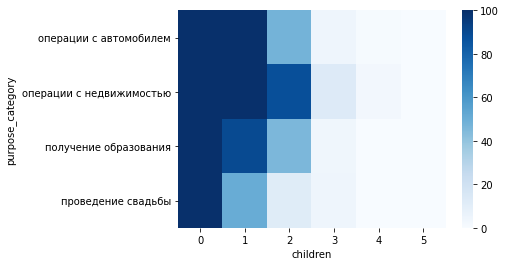

In [31]:
sns.heatmap(data_pivot3, vmin=0, vmax=100,cmap='Blues');
#построим тепловую карту для наглядного отображения результатов

**Вывод:** 
Клиенты у которых 4,2,1 детей чаще  не возврващают кредиты в срок, чем те у кого 3,5 детей или нет детей. При этом клиенты с 5 детьми вообще не имееют задолженностей,но таких клиентов всего 9 в данной выборке. Процент просрочек в категориях с 4 и 2 отличается незначительно.Сделать вывод что клиенты с наибольшим количеством детей самые надежные, а с наименьшим - самые не надежные без учета других показателей нельзя.

При анализе сводных таблиц видно, что:
 - среди должников больше всего женатых/замужних людей без детей(сводная таблица №1).
 - среди должников больше всего бездетных со средним уровнем дохода. При этом должников со средним уровнем дохода С больше с количеством детей 0,1,2 чем в категориях с другим уровнем дохода. Можно сделать вывод, что доход влияет на погашение кредита в срок больше чем количество детей(сводная таблица№2).
 - среди должников больше всего бездетных,при чем во всех категориях назначения кредита(сводная таблица №3).

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Сгруппируем данные по категориям семейного положения.

Столбец sum - cумма значений по столбцу debt отражает суммарное количество фактов просрочки
по кредиту в каждой категории, так как 1 - есть просрочка, 0 - нет просрочки.
Столбец count - количество клиентов в данной категории.  
Столбец ratio - отношение количества фактов просрочки по кредиту к общему количеству клиентов в данной категории.
Данный столбец необходим, так как в количество клиентов в категориях сильно различается.

In [32]:
data_family_grouped=data.groupby('family_status').agg({'debt':['sum','count']})
data_family_grouped['ratio']=data_family_grouped['debt']['sum']/data_family_grouped['debt']['count']
data_family_grouped['ratio'] *= 100 # умножим на 100 для наглядности

Отсортируем данные по убыванию столбца ratio.

In [33]:
data_family_sorted = data_family_grouped.sort_values(by='ratio',ascending=False)
data_family_sorted 

debt            ratio
                       sum  count          
family_status                              
Не женат / не замужем  273   2796  9.763948
гражданский брак       385   4134  9.313014
женат / замужем        927  12261  7.560558
в разводе               84   1189  7.064760
вдовец / вдова          63    951  6.624606

Построим сводную таблицу№4 для клиентов, имеющих задолженность и посмотрим их семейный статус и цель кредита. 

In [34]:
data_pivot4 = data.pivot_table(index=['purpose_category'], columns='family_status', values='debt', aggfunc='sum')
data_pivot4 = data_pivot4.fillna(0).astype(int)
data_pivot4

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
purpose_category,,,,,
операции с автомобилем,82,21,20,51,226
операции с недвижимостью,129,46,28,91,486
получение образования,62,17,15,60,215
проведение свадьбы,0,0,0,183,0


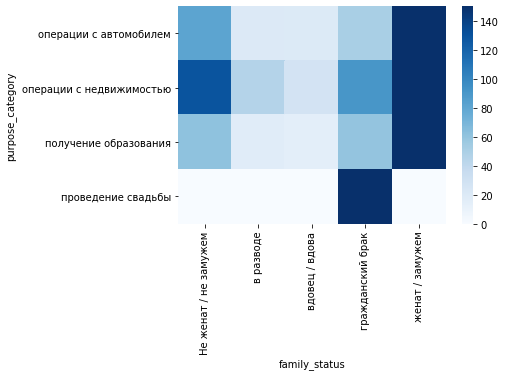

In [35]:
sns.heatmap(data_pivot4, vmin=0, vmax=150,cmap='Blues');
#построим тепловую карту для наглядного отображения результатов

Построим сводную таблицу№5 для клиентов, имеющих задолженность и посмотрим их семейный статус и уровень дохода. 

In [36]:
data_pivot5 = data.pivot_table(index=['total_income_category'], columns='family_status', values='debt', aggfunc='sum')
data_pivot5 = data_pivot5.fillna(0).astype(int)
data_pivot5

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
total_income_category,,,,,
A,0,0,0,1,1
B,62,18,9,64,201
C,209,64,54,315,711
D,2,2,0,5,12
E,0,0,0,0,2


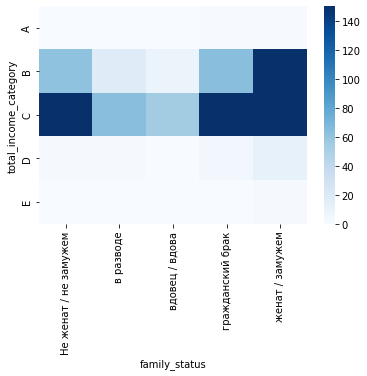

In [37]:
sns.heatmap(data_pivot5, vmin=0, vmax=150,cmap='Blues');
#построим тепловую карту для наглядного отображения результатов

**Вывод:** 
Клиенты с семейным положением "не женат/не замужем" и "гражданский брак" чаще  не возврващают кредиты в срок, чем клиенты с семейным положением "женат/замужем","в разводе", "вдовец/вдова".

При анализе сводных таблиц видно, что:
- среди должников больше всего со статусом "гражданский брак" при цели кредита "свадьба" и "женат/замужем" для всех остальных целей кредита.(сводная таблица №4)
- среди должников больше всего со статусом "женат/замужем" со средним уровнем дохода С. При этом видно что в в категории среднего дохода С должников с любым семейным статусом больше чем в других категориях дохода(сводная таблица №5).

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Сгруппируем данные по категориям уровня дохода.

Столбец sum - cумма значений по столбцу debt отражает суммарное количество фактов просрочки
по кредиту в каждой категории, так как 1 - есть просрочка, 0 - нет просрочки.
Столбец count - количество клиентов в данной категории.  
Столбец ratio - отношение количества фактов просрочки по кредиту к общему количеству клиентов в данной категории.
Данный столбец необходим, так как в количество клиентов в категориях сильно различается.

In [38]:
data_total_income_category_grouped=data.groupby('total_income_category').agg({'debt':['sum','count']})
data_total_income_category_grouped['ratio']=data_total_income_category_grouped['debt']['sum'] / \
                                            data_total_income_category_grouped['debt']['count']
data_total_income_category_grouped['ratio'] *= 100 #умножим на 100 для наглядности

Отсортируем данные по убыванию столбца ratio.

In [39]:
data_total_income_category_sorted = data_total_income_category_grouped.sort_values(by='ratio',ascending=False)
data_total_income_category_sorted

debt            ratio
                        sum  count          
total_income_category                       
E                         2     22  9.090909
C                      1353  15921  8.498210
A                         2     25  8.000000
B                       354   5014  7.060231
D                        21    349  6.017192

Построим сводную таблицу№6 для клиентов, имеющих задолженность и посмотрим их уровень дохода и цель кредита. 

In [40]:
data_pivot6 = data.pivot_table(index=['total_income_category'], columns='purpose_category', values='debt', aggfunc='sum')
data_pivot6

purpose_category,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
total_income_category,,,,
A,0,1,1,0
B,85,172,69,28
C,305,599,297,152
D,10,6,2,3
E,0,2,0,0


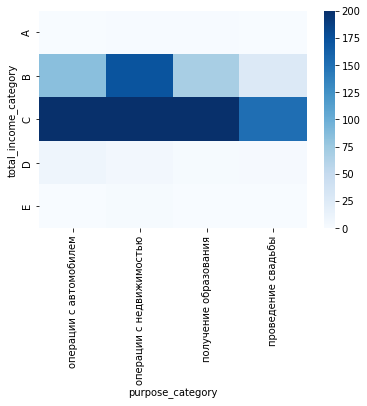

In [41]:
sns.heatmap(data_pivot6, vmin=0, vmax=200,cmap='Blues');
#построим тепловую карту для наглядного отображения результатов

**Вывод:** 
Клиенты с наименьшим доходом, категория Е чаще других не возвращают кредит во время, однако таких клиентов всего 22 в данной выборке. Вто время как клиентов категории С существенно больше, а они находятся на втором месте по частоте просрочек. С - средний класс, средний уровень дохода.
Категории с самым большим и с самым маленьким доходом (А и Е) самые малочисленные.

При анализе сводных таблиц видно, что:
- среди должников больше всего с уровнем дохода С при любых целях кредита.


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Сгруппируем данные по категориям уровня дохода.

Столбец sum - cумма значений по столбцу debt отражает суммарное количество фактов просрочки
по кредиту в каждой категории, так как 1 - есть просрочка, 0 - нет просрочки.
Столбец count - количество клиентов в данной категории.  
Столбец ratio - отношение количества фактов просрочки по кредиту к общему количеству клиентов в данной категории.
Данный столбец необходим, так как в количество клиентов в категориях сильно различается.

In [42]:
data_purpose_category_grouped=data.groupby('purpose_category').agg({'debt':['sum','count']})
data_purpose_category_grouped['ratio'] = data_purpose_category_grouped['debt']['sum'] / \
                                         data_purpose_category_grouped['debt']['count']
data_purpose_category_grouped['ratio'] *= 100 # умножим на 100 для наглядности

Отсортируем данные по убыванию столбца ratio.

In [43]:
data_purpose_category_sorted = data_purpose_category_grouped.sort_values(by='ratio',ascending=False)
data_purpose_category_sorted

debt            ratio
                          sum  count          
purpose_category                              
операции с автомобилем    400   4279  9.347978
получение образования     369   3988  9.252758
проведение свадьбы        183   2313  7.911803
операции с недвижимостью  780  10751  7.255139

**Вывод:** 
Чаще всего кредит берут на операции с недвижимостью, однако просрочек по ним меньше всего.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
Данные были пропущенны в столбцах total_income и days_employed, при этом количество пропусков в столбцах одинаковое.  Когда есть пропуск в данных о трудовом стаже, то есть пропуск и в данных об уровне дохода. Вероятно клиентом не были предоставлены все необходимые документы из пакета документов для оформления кредита (копии трудовой, справка о доходах, СНИЛС и др.)

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианное значение более обьективно в условиях большого разброса значений. В столбце о доходах клиентов максимальное и минимальное значения отличаются больше чем в 10 раз, при этом  в данных нет плавного роста от минимума до максимума, а есть выбросы в обе стороны. Аналогичная ситуация с данными о трудовом стаже.

In [44]:
data['total_income'].max() # максимальное значение ежемесячного дохода 

2265604

In [45]:
data['total_income'].min() # минимальное значение ежемесячного дохода 

20667

In [46]:
data['days_employed'].max() # максимальное значение трудового стажа 

401755.40047533

In [47]:
data['days_employed'].min() # минимальное значение трудового стажа  

24.14163324048118

### Шаг 4: общий вывод.

**Поставленная задача - понять, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.** Входные данные— статистика о платёжеспособности клиентов.

**Была проведена предварительная обработка данных:**
- обработаны аномальные значения(0 и -20 для столбца "дети"(children));
- удалены явные дубликаты (71 строка);
- пропуски в столбцах "доходы"(total_income) и "трудовой стаж"(days_employed) заменены на медианное значение для каждой категории плательщиков по типу занятости, всего 2174 пропуск в каждом столбце;
- по уровню дохода клиенты разбиты на следующие категории;
    - 0–30000 — 'E';
    - 30001–50000 — 'D';
    - 50001–200000 — 'C';
    - 200001–1000000 — 'B';
    - 1000001 и выше — 'A'.

**При проведении исследования поставлены следующие гипотезы:**
1. количество детей влияет на факт погашения кредита в срок
2. семейное положение влияет на факт погашения кредита в срок
3. уровень дохода влияет на факт погашения кредита в срок
4. цель кредита влияет на факт погашения кредита в срок

**Гипотеза №1 - количество детей влияет на факт погашения кредита в срок.**
Клиенты с детьми чаще имеют задолженности, чем клиенты без детей. Так доля должников среди клиентов без детей - 7,5%,с одним ребенком - 9,2%, c двумя - 9,5%, с тремя - 8,2% , с четыремя - 9,8%. Клиенты с 5 детьми задолженности не имеют.  Сделать однозначный вывод о влиянии количества детей на факт просрочки нельзя, тк данные неоднородные - в выборке всего 9 клиентов с пятью детьми и 41 клиент с 4 детьми.

Возможно,что клиенты с 4 и 5 детьми реже берут кредиты или таких семей вцелом меньше, чем с 1,2,3 детьми. Вероятно, клиентам с детьми сложнее выполнять финансовые обязательства, наличие детей часто влечет за собой незапланированные расходы.

Однако это не единственный фактор влияющий на наличие просрочки. Далее, при анализе сводных таблиц в п.3.1. видно, что уровень дохода и цель кредита влияют на факт неуплаты больше чем количество детей. 


**Гипотеза №2 - семейное положение влияет на факт погашения кредита в срок.**  
Cемейное положение оказывает влияние на погашение кредита в срок. Самый высокий процент должников среди клиентов со статусом "не женат/не замужем"(9,8%) и "гражданский брак"(9,3%). Те клиенты кто состоит или состоял в браке реже имеют задолженности: "женат/замужем"(7,6%), "в разводе"(7,1%), "вдовец/вдова" (6,6%). Так же женатые/замужние люди это самая большая категория клиентов.

Среди должников больше всего со статусом "гражданский брак" при цели кредита "свадьба" и "женат/замужем" для всех остальных целей кредита.  
  
Стоит отметить, что в категории среднего дохода С должников с любым семейным статусом больше чем в других категориях дохода. Вероятно, уровень дохода влияет на просрочки сильнее чем семейный статус. 
     

**Гипотеза №3 - уровень дохода влияет на факт погашения кредита в срок.** 
Клиенты с наименьшим доходом, категория Е чаще других не возвращают кредит во время, однако таких клиентов всего 22 в данной выборке(9,1%). На втором месте находятся клиенты со средним уровнем дохода С (8,5%), так же это самая многочисленная категория клиентов. В данных по доходам были пропуски,что могло оказать влияние на итоговые результаты анализа. Так же, при анализе видно, что должников больше всего со средним уровнем дохода С при любых целях кредита. 


**Гипотеза №4 - цель кредита влияет на факт погашения кредита в срок.** 
Самый большой процент долженности у кредитов,взятых для приобретения автомобиля - 9,3% и получения образования - 9,3%,а наименьшией у ипотечных кредитов - 7,3%. Можно сделать вывод,что цель кредита влияет на  вероятность вернуть кредит вовремя.
    

**Рекомендации**
При построении модели кредитного скоринга учитывать влиение семейного положения и цели кредита. Провести дополнительное исследование на более однородных данных, установить причину пропусков данных по доходу клиентов. 
  